# Logistic Regression – Titanic Survival Prediction

## 1. Data Loading and Exploration

In [1]:

import pandas as pd

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:

train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Exploratory Data Analysis

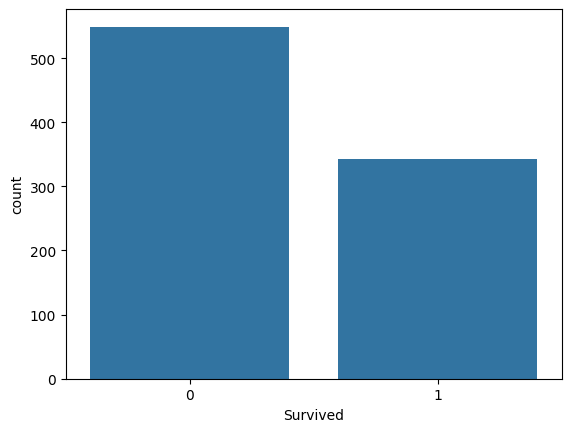

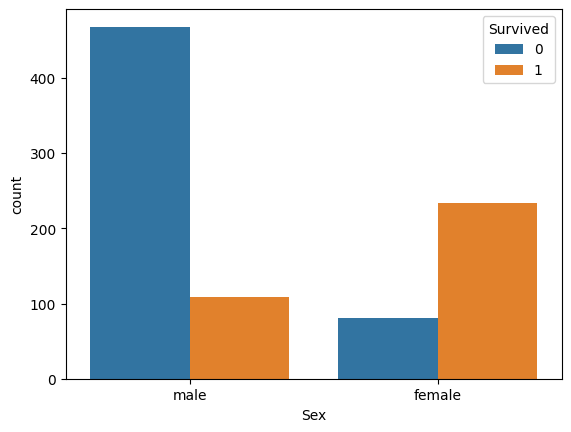

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Survived", data=train)
plt.show()

sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()


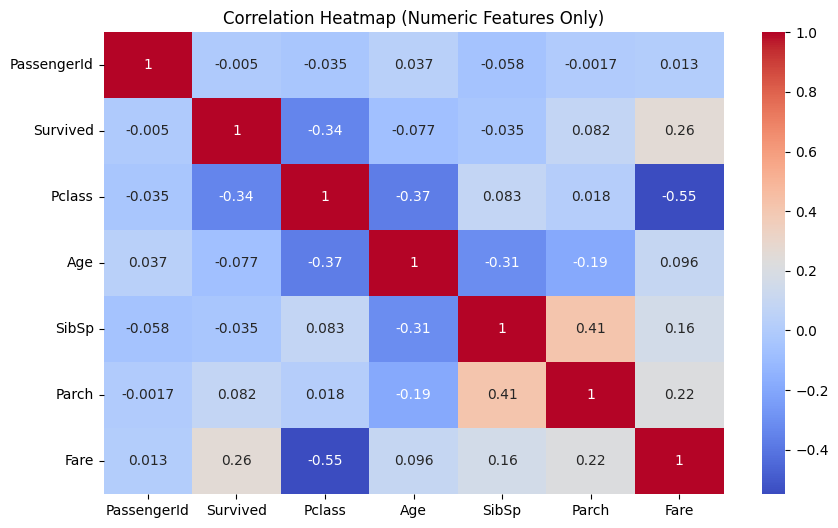

In [4]:

numeric_df = train.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


### Additional Visualizations

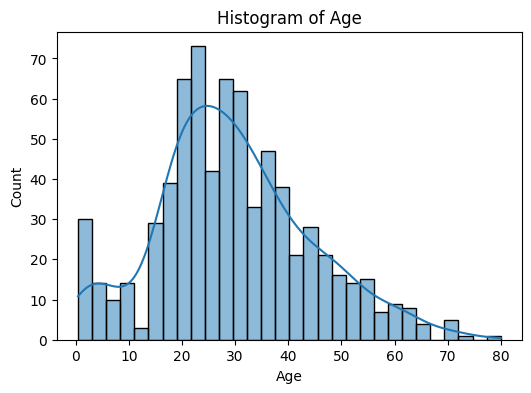

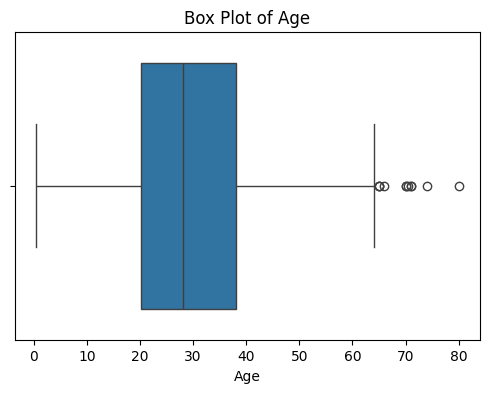

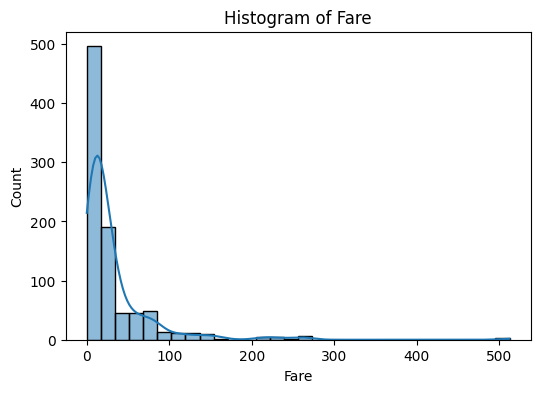

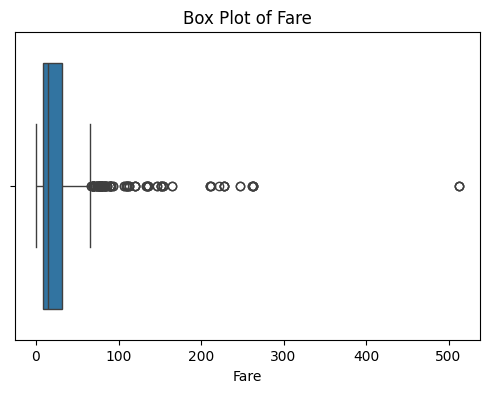

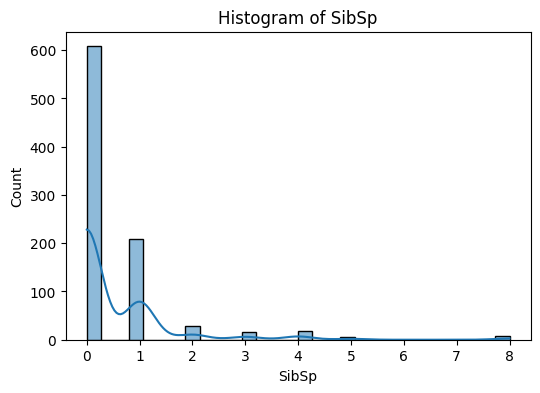

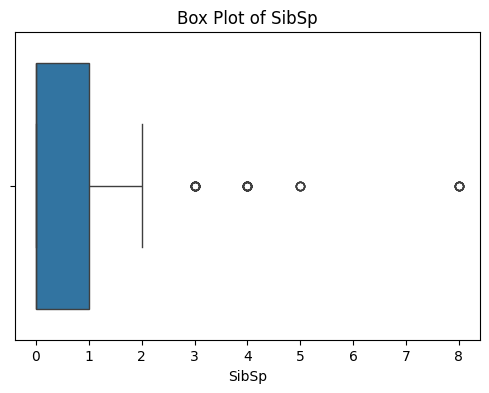

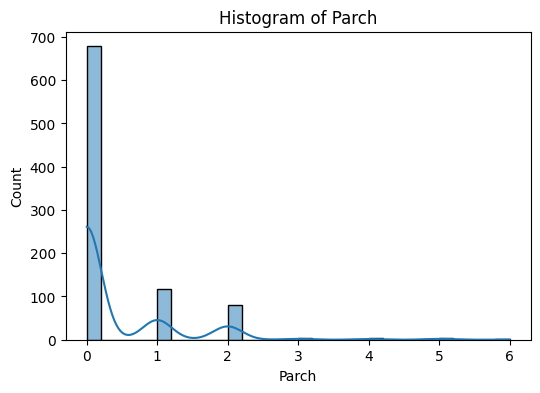

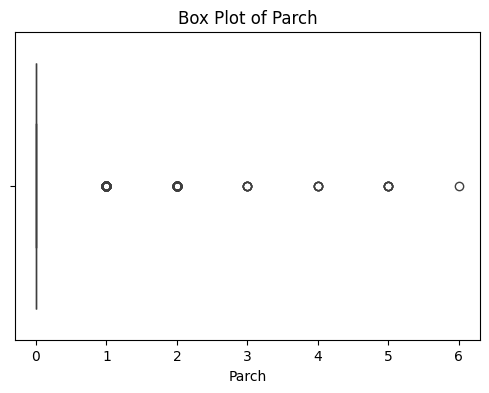

In [5]:

numeric_features = ["Age", "Fare", "SibSp", "Parch"]

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


## 3. Data Preprocessing

In [6]:

train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

train = pd.get_dummies(train, columns=["Sex", "Embarked"], drop_first=True)
test = pd.get_dummies(test, columns=["Sex", "Embarked"], drop_first=True)


/tmp/ipython-input-2175288383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
/tmp/ipython-input-2175288383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

## 4. Model Building

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = train.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 5. Model Evaluation

Accuracy: 0.8044692737430168
Precision: 0.7746478873239436
Recall: 0.7432432432432432
F1 Score: 0.7586206896551724
ROC-AUC: 0.8769626769626769
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



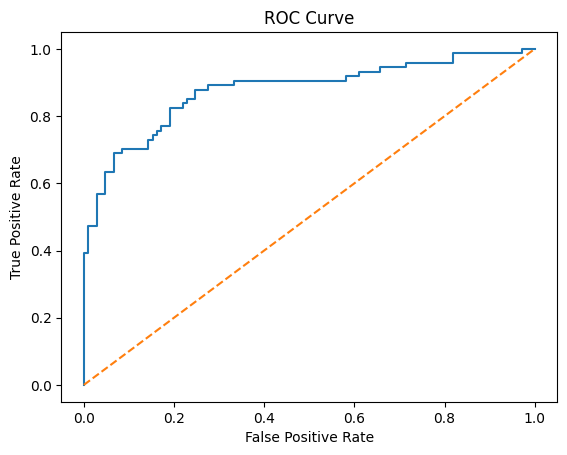

In [8]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## 6. Model Interpretation

In [9]:

import numpy as np
import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients["Odds_Ratio"] = np.exp(coefficients["Coefficient"])
coefficients.sort_values(by="Odds_Ratio", ascending=False)


,Feature,Coefficient,Odds_Ratio
5,Fare,0.002616,1.002619
0,PassengerId,0.000353,1.000353
2,Age,-0.030566,0.969896
7,Embarked_Q,-0.108992,0.896738
4,Parch,-0.117193,0.889413
3,SibSp,-0.288064,0.749714
8,Embarked_S,-0.399364,0.670746
1,Pclass,-0.933379,0.393223
6,Sex_male,-2.607434,0.073723


In [14]:
!ls


app.py	sample_data  Titanic_test.csv  Titanic_train.csv


In [16]:
import joblib
from google.colab import files

joblib.dump(model, 'logistic_titanic_model.pkl')
files.download('logistic_titanic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


### Interpretation Summary
- Odds Ratio > 1 increases survival probability.
- Odds Ratio < 1 decreases survival probability.
- Gender and passenger class are the strongest predictors.


## Interview Questions


**Precision vs Recall**  
Precision measures correctness of positive predictions, while recall measures coverage of actual positives.

**Cross-Validation**  
Cross-validation splits data into multiple folds to provide a reliable estimate of model performance and reduce overfitting.
